# 숙제#2

## 3.2

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math

In [2]:
def clgs(A):
    m,n=np.shape(A)
    V=copy.deepcopy(A)
    Q=np.eye(m,n)
    R=np.zeros([n,n])
    for j in range(n):
        for i in range(j):
            R[i,j]=Q[:,i].T@A[:,j]
            V[:,j]=V[:,j]-R[i,j]*Q[:,i]
        R[j,j]=np.linalg.norm(V[:,j])
        Q[:,j]=V[:,j]/R[j,j]
    return Q,R

def mgs(A):
    m,n=np.shape(A)
    Q=copy.deepcopy(A)
    R=np.zeros([n,n])
    for i in range(n-1):
        R[i,i]=np.linalg.norm(Q[:,i])
        Q[:,i]=Q[:,i]/R[i,i]
        R[i,i+1:n]=Q[:,i]@Q[:,i+1:n]
        Q[:,i+1:n]=Q[:,i+1:n]-np.array([Q[:,i]]).T@np.array([R[i,i+1:n]])
    R[n-1,n-1]=np.linalg.norm(Q[:,n-1])
    Q[:,n-1]=Q[:,n-1]/R[n-1,n-1]
    return Q,R

def qrhouse(A):
    m,n=np.shape(A)
    R=copy.deepcopy(A)
    V=np.zeros([m,n])
    for k in range(0,min(m-1,n)):
        x=R[k:m,k]
        v=x+np.sign(x[0])*np.linalg.norm(x)*np.eye(1,len(x))
        V[k:m,k]=v
        R[k:m,k:n]=R[k:m,k:n]-2*v.T@v@np.array([R[k:m,k:n]])/np.linalg.norm(v)**2
    R=np.triu(R[0:n,0:n])
    return V,R

def formQ(A):
    V,R=qrhouse(A)
    m,n=np.shape(V)
    Q=np.eye(m)
    for j in range(min(m-1,n)-1,-1,-1):
        v=np.array([V[:,j]])
        Q=Q-2*v.T@v@Q/np.linalg.norm(v)**2
    return Q

### (a)

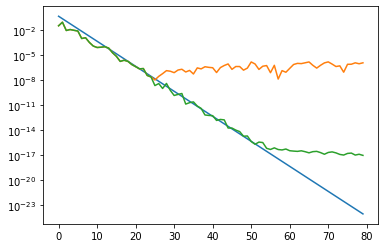

In [3]:
U,X=np.linalg.qr(np.random.rand(80,80))
V,X=np.linalg.qr(np.random.rand(80,80))
S=np.diag([2**(-j) for j in range(1,81)])
A=U@S@V
Qc,Rc=clgs(A)
Qm,Rm=mgs(A)
plt.semilogy([S[j,j] for j in range(80)])
plt.semilogy([Rc[j,j] for j in range(80)])
plt.semilogy([Rm[j,j] for j in range(80)])
plt.show()

#### using modified gram-schmidt is more stable

### (b)

In [4]:
A=np.array([[0.7,0.70711],[0.70001,0.70711]]).astype(float)
Qm,Rm=mgs(A)
V,R=qrhouse(A)
Q=formQ(V)
print("using householder",np.linalg.norm(Q.T@Q-np.eye(2)))
print("using modified gram-schmidt",np.linalg.norm(Qm.T@Qm-np.eye(2)))

using householder 5.882152461094689e-16
using modified gram-schmidt 3.254726094493924e-11


#### householder is more numerically stable

## 3.3

In [5]:
def Givens(i,k,m,t):
    G=np.eye(m)
    G[i,k]=-math.sin(t)
    G[i,i]=math.cos(t)
    G[k,k]=math.cos(t)
    G[k,i]=math.sin(t)
    return G

def qrgivens(A):
    R=copy.deepcopy(A)
    m,n=np.shape(A)
    Q=np.eye(m)
    if m<=n:
        k=n-1
    else:
        k=n
    for j in range(k):
        for i in range(m-1,j,-1):
            t=math.atan(R[i,j]/R[j,j])
            G=Givens(i,j,m,t)
            R=G@R
            Q=Q@G.T

    return Q,R

A=np.array([[12,-51,4],[6,167,-68],[-4,24,-41]])
Q,R=qrgivens(A)
S,T=np.linalg.qr(A)
print(Q)
print(S)
print(R)
print(T)
print("test success")

[[ 0.85714286 -0.39428571  0.33142857]
 [ 0.42857143  0.90285714 -0.03428571]
 [-0.28571429  0.17142857  0.94285714]]
[[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
[[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [-6.65654026e-16  1.75000000e+02 -7.00000000e+01]
 [ 2.52780010e-17  5.36854862e-16 -3.50000000e+01]]
[[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]
test success


#### 부호 외의 모든 entry 값이 같다. R에서 0으로 표현되지 않고 굉장히 작은 수로 표시되는데, 이는 삼각함수를 계산하는 과정에서 생기는 machine error이다.

## 4.3

In [6]:
def randmat(m):
    A=np.random.normal(0,math.sqrt(m),size=(m,m))
    return A

def study_mat(s):
    M=[8,16,32,64]
    spec=[0.0]*M[len(M)-1]
    spec2=[0.0]*M[len(M)-1]
    spec3=[0.0]*M[len(M)-1]
    rho=np.zeros([M[len(M)-1],100])
    norm2=np.zeros([M[len(M)-1],100])
    ssv=np.zeros([M[len(M)-1],100])
    for m in M:
        plt.subplot()
        for i in range(100):
            if s=='rec':
                A=randmat(m)
            if s=='tri':
                A=np.triu(randmat(m))
            l=np.linalg.eigvals(A)
            x=[l[m].real for m in range(m)]
            y=[l[m].imag for m in range(m)]
            plt.scatter(x,y)
            rho[m-1][i]=max([np.linalg.norm(l[i]) for i in range(m)])
            norm2[m-1][i]=np.linalg.norm(A,ord=2)
            ssv[m-1][i]=np.linalg.norm(A,ord=-2)
        spec[m-1]=max(rho[m-1,:])
        spec2[m-1]=max(norm2[m-1,:])
        spec3[m-1]=min(ssv[m-1,:])
        plt.show()
    plt.subplot()
    plt.plot([M[i] for i in range(len(M))],[spec[i-1] for i in M],'r')
    plt.plot([M[i] for i in range(len(M))],[spec2[i-1] for i in M],'g')
    plt.plot([M[i] for i in range(len(M))],[spec3[i-1] for i in M],'b')
    plt.show()   
    plt.subplot()
    plt.hist(ssv[63])
    plt.show()

### (a), (b), (c)

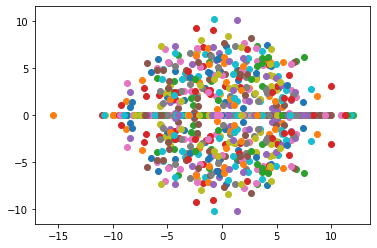

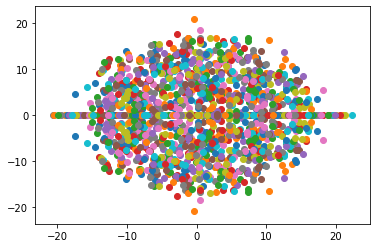

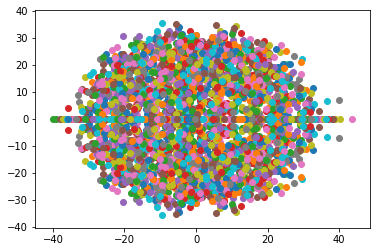

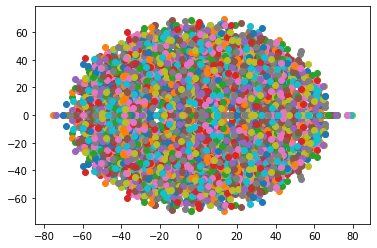

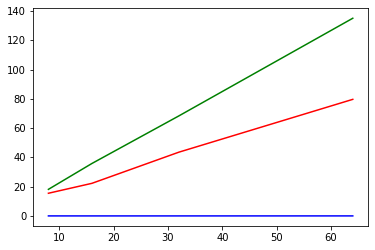

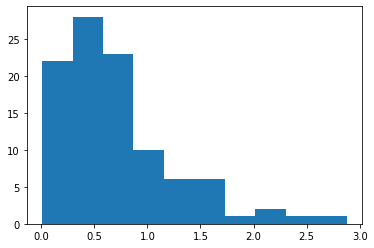

In [7]:
study_mat('rec')

#### (a)
#### 여러 번 반복하면 복소평면에서 반지름이 m인 원 안에 eigenvalue들이 위치하게 되는 것을 알 수 있다. spectral radius는 결국 그린 그래프, 즉, 원의 반지름 정도 나올 것임을 예상할 수 있는데, 실제로 그래프를 그려보면 y=x 형태의 그래프가 그려진다.

#### (b)
#### 2-norm은 largest singular value를 반환하기 때문에 마찬가지로 1차식이 된다. spectral radius보다 항상 크다. m이 커진다고 equality로 가지는 않는다. spectral norm은 lim||A^r||^(1/r)임을 유의하자.

#### (c)
#### smallest singular value는 0이 될 가능성이 높으며 probability distribution은 정규분포와 비슷하다. 이는 정규분포로 행렬을 잡았기 때문이다. m이 커질수록 정규분포에 가까워질 것이다.

### (d)

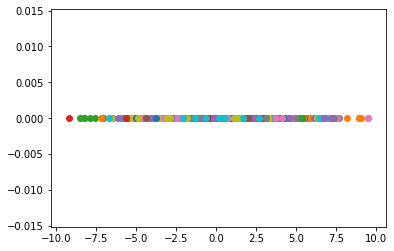

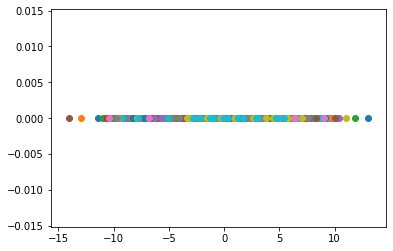

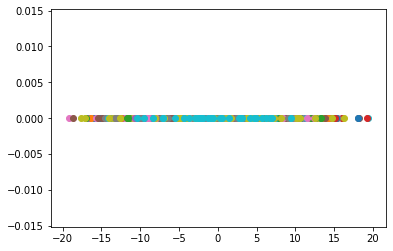

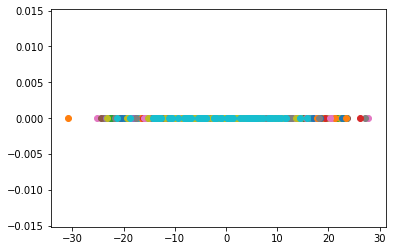

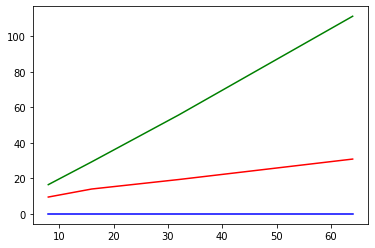

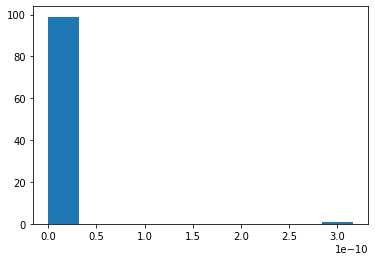

In [8]:
study_mat('tri')

#### upper triangular matrix에서는 complex eigen vector가 나오지 않는다. 이는 행렬을 특성다항식을 어떻게 구하는 지를 생각해보면 자명하다. 각각의 norm에 대한 그래프는 기울기가 조금씩 줄어든 형태를 보인다. 특히 smallest signular value의 분포의 경우는 거의 대부분 0만 나오는 것을 알 수 있다.

## 4.6

In [9]:
m,n=50,12
t=np.linspace(0,1,m)
b=np.array([math.cos(4*t[i]) for i in range(m)])
A=np.vander(t,n)
A=np.flip(A,axis=1)

### (a)

In [10]:
def formation(A,b):
    x=np.linalg.pinv(A)@b
    return x
xa1=formation(A,b)
print(xa1)
xa2=np.linalg.solve(A.T@A,A.T@b)
print(xa2)

[ 1.00000000e+00 -4.22743363e-07 -7.99998124e+00 -3.18763323e-04
  1.06694308e+01 -1.38202902e-02 -5.64707562e+00 -7.53160345e-02
  1.69360697e+00  6.03210286e-03 -3.74241701e-01  8.80405757e-02]
[ 1.00000002e+00 -6.74894115e-06 -7.99974530e+00 -3.77836055e-03
  1.06958171e+01 -1.32538701e-01 -5.31131469e+00 -6.88924641e-01
  2.41731736e+00 -5.25870533e-01 -1.52710549e-01  4.81114266e-02]


### (b)

In [11]:
def mgsls(A,b):
    Q,R=mgs(A)
    x=np.linalg.solve(R,Q.T@b)
    return x
xb=mgsls(A,b)
print(xb)

[ 9.99999997e-01  6.30649718e-07 -8.00002060e+00  2.59258080e-04
  1.06650182e+01  6.04703055e-03 -5.70329497e+00  2.74703171e-02
  1.57233403e+00  9.51903709e-02 -4.11384592e-01  9.47367621e-02]


### (c)

In [12]:
def qrhousels(A,b):
    Q,R=qrhouse(A)
    x=np.linalg.solve(R,Q.T@b)
    return x
xc=mgsls(A,b)
print(xc)   

[ 9.99999997e-01  6.30649718e-07 -8.00002060e+00  2.59258080e-04
  1.06650182e+01  6.04703055e-03 -5.70329497e+00  2.74703171e-02
  1.57233403e+00  9.51903709e-02 -4.11384592e-01  9.47367621e-02]


### (d)

In [13]:
def qrls(A,b):
    Q,R=np.linalg.qr(A)
    x=np.linalg.solve(R,Q.T@b)
    return x
xd=mgsls(A,b)
print(xd)

[ 9.99999997e-01  6.30649718e-07 -8.00002060e+00  2.59258080e-04
  1.06650182e+01  6.04703055e-03 -5.70329497e+00  2.74703171e-02
  1.57233403e+00  9.51903709e-02 -4.11384592e-01  9.47367621e-02]


### (e)

In [14]:
xe=np.linalg.lstsq(A,b,rcond=None)[0]
print(xe)

[ 1.00000000e+00 -4.22743379e-07 -7.99998124e+00 -3.18763320e-04
  1.06694308e+01 -1.38202900e-02 -5.64707562e+00 -7.53160325e-02
  1.69360697e+00  6.03210270e-03 -3.74241701e-01  8.80405757e-02]


### (f)

In [15]:
def SVDls(A,b):
    U,s,V=np.linalg.svd(A,full_matrices=True)
    S=np.zeros(A.shape)
    for i in range(len(s)):
        S[i][i]=s[i]
    x=V@np.linalg.pinv(S)@U.T@b
    return x
xf=SVDls(A,b)
print(xf)

[-7.21141147 -8.59378586  2.34084478  4.30625222  4.7850129  -2.30453607
 -1.85380568 -0.11494468 -0.09025278  2.2237956   4.21177306  3.0850394 ]


### (g)

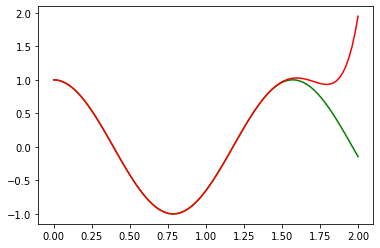

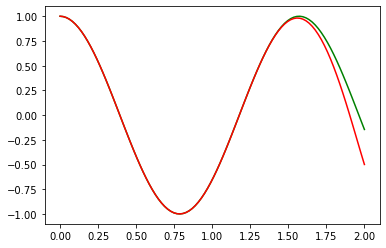

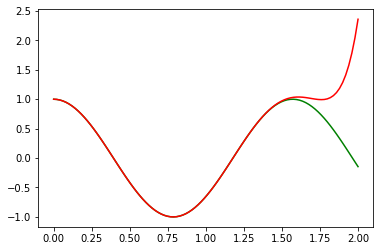

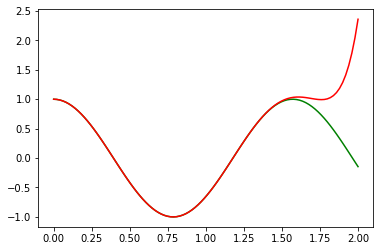

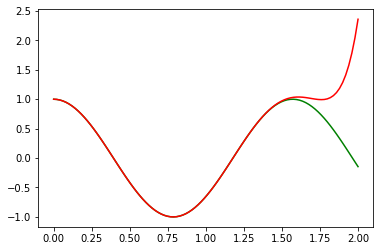

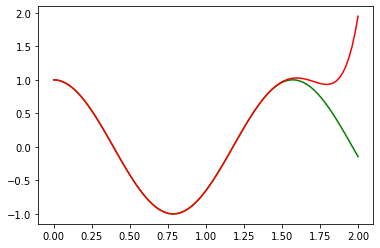

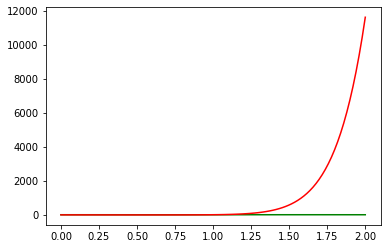

In [16]:
x=np.array([xa1,xa2,xb,xc,xd,xe,xf])

def makepoly(x,c):
    c=np.array([c])
    k=np.array([[x**(i) for i in range(n)]]).T
    return c@k

t2=np.linspace(0,2,100)
b2=np.array([math.cos(4*t2[i]) for i in range(len(t2))])
for i in range(7):
    plt.subplot()
    plt.plot(t2,b2,'g')
    l=[makepoly(t2[m],x[i])[0][0] for m in range(len(t2))]
    plt.plot(t2,l,'r')
    plt.show()
    

#### 첫 번째 plot은 inverse를 사용했기 때문에 t가 커질수록 error가 커진다. 두 번째 plot처럼 solve method를 쓰면 오차가 줄어든다. mgs, qrhouse, qr, lstsq method를 사용하면 coefficient 값이 거의 같기 때문에 그래프로도 볼 수 있듯이 그 모양이 거의 같다. 물론 모든 그래프가 [0,1]에서는 거의 완벽하게 들어맞는다. rounded error가 생긴 coefficient는 가장 정확한 normal equation을 gaussian method로 푼 경우 외에서 모두 존재하게 된다. 가장 결과가 이상한 부분은 SVD를 사용한 경우인데, 이는 A를 S,V,D로 분해하고, 다시 합치는 과정에서 많은 roundoff error가 발생하기 때문이다.